# BlindCliffWalker comparison of different replay memory sampling strategies

In [2]:
import numpy as np
import pandas as pd
from liftoff.liftoff_results import collect_results

import altair as alt
alt.renderers.enable('notebook')
np.set_printoptions(linewidth=120, precision=3, suppress=True)

In [12]:
experiment_name = 'rank_alpha_sweep'

result_paths = collect_results(experiment_name=experiment_name,
                               results_dir='../results', 
                               names=['results.msgpack'])
result_paths = [p for p in result_paths if p[1]]
result_data_frames = [pd.read_msgpack(f'{p[0]}/{p[1][0]}') for p in result_paths]

data = pd.concat(result_data_frames, ignore_index=True)
data.sample(10)

,N,mem_size,optim_steps,trial,sampling_type
157,5,62,550,17,uniform
377,3,14,133,13,rank_alpha:0.7
159,5,62,769,8,uniform
16,10,2046,29689,12,uniform
197,14,32766,54518,7,rank_alpha:0.9
319,4,30,229,17,rank_alpha:0.3
196,11,4094,17279,0,rank_alpha:0.5
399,3,14,112,9,rank_alpha:0.3
120,9,1022,3463,16,rank_alpha:0.5
372,14,32766,102138,15,rank_alpha:0.7


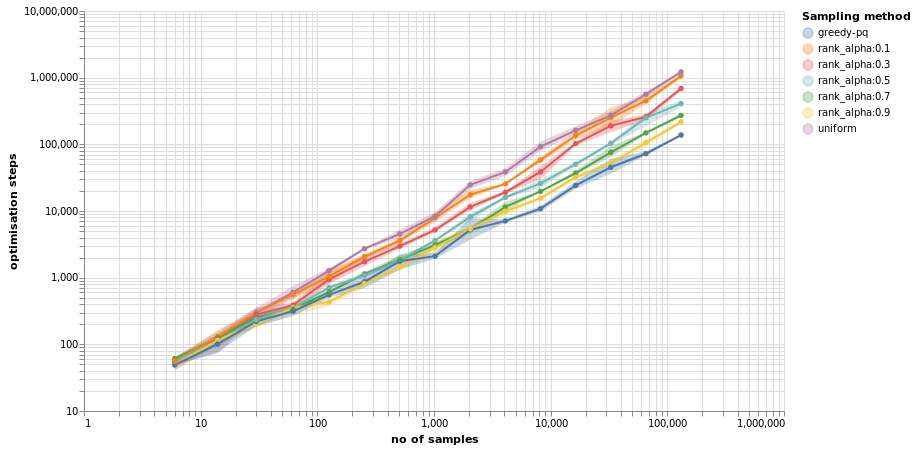

In [13]:
x_axis = alt.X('mem_size', scale=alt.Scale(type='log'), axis=alt.Axis(title='no of samples'))

line = alt.Chart(data).mark_line(point=True).encode(
    x=x_axis,
    y='mean(optim_steps)',
    color=alt.Color('sampling_type', legend=alt.Legend(title="Sampling method")),
    tooltip=['mem_size', 'mean(optim_steps)', 'sampling_type']
)

confidence_interval = alt.Chart(data).mark_area(opacity=0.3).encode(
    x=x_axis,
    y=alt.Y('ci0(optim_steps)', axis=alt.Axis(title='optimisation steps'), scale=alt.Scale(type='log')),
    y2='ci1(optim_steps)',
    color=alt.Color('sampling_type')
)

(confidence_interval + line).interactive().properties(width=700, height=400)